In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('../data/stock_percentage_difference.csv')

In [3]:
#dropping because I deleted in feature engineering thing
# df.drop(columns=['Unnamed: 0','merge_key','people'], inplace=True)

In [4]:
#df_purchases = df[df['type'] == 'purchase']

In [5]:
df.type

0        sale_partial
1            purchase
2            purchase
3        sale_partial
4        sale_partial
             ...     
10076    sale_partial
10077    sale_partial
10078        purchase
10079        purchase
10080    sale_partial
Name: type, Length: 10081, dtype: object

In [6]:
df.columns

Index(['level_0', 'transaction_date', 'ticker', 'asset_description', 'type',
       'amount', 'representative', 'timestamp', 'state', 'party_x',
       'total_senate_years', 'total_house_years', 'total_years',
       'total_raised', 'total_from_small_donors', 'percent_from_small_donors*',
       'total_money_raised', 'start', 'day_30', 'day_30_stock_perc_diff',
       'day_60', 'day_60_stock_perc_diff', 'day_90', 'day_90_stock_perc_diff',
       'day_180', 'day_180_stock_perc_diff', 'sp_start', 'sp_30',
       'sp_30_sp_perc_diff', 'sp_60', 'sp_60_sp_perc_diff', 'sp_90',
       'sp_90_sp_perc_diff', 'sp_180', 'sp_180_sp_perc_diff'],
      dtype='object')

In [7]:
df['representative'].nunique()

138

In [8]:
# start of data
df['transaction_date'].min()

'2013-03-15'

In [9]:
# end of data
df['transaction_date'].max()

'2020-11-24'

In [10]:
df.head(1)

,level_0,transaction_date,ticker,asset_description,type,amount,representative,timestamp,state,party_x,...,day_180_stock_perc_diff,sp_start,sp_30,sp_30_sp_perc_diff,sp_60,sp_60_sp_perc_diff,sp_90,sp_90_sp_perc_diff,sp_180,sp_180_sp_perc_diff
0,0,2020-03-18,CBRE,CBRE Group Inc Common Stock Class A,sale_partial,"$1,001 - $15,000",Susie Lee,1584504000,Nevada,Democratic,...,0.321,2398.100098,2874.560059,0.199,2953.909912,0.232,3097.73999,0.292,3340.969971,0.393


In [11]:
# how many transactions did 
df_transaction_num = df.groupby(['representative'])[['ticker']].count()

In [12]:
df_transaction_num[df_transaction_num['ticker']==1627]

,ticker
representative,
"David A Perdue , Jr",1627


In [13]:
con_stocks_avg_180_days = df.groupby(['representative'])[['day_180_stock_perc_diff']].mean()


In [14]:
# get the avg stock performance by representative after 180 days
con_stocks_avg_180_days = df.groupby(['representative'])[['day_180_stock_perc_diff']].mean()

# get the mean S&P 500 performance after 180 days from when a congressman purchased stock
sp_avg_180_days = df.groupby(['representative'])[['sp_180_sp_perc_diff']].mean()

In [15]:
# look at the top stock returns for congressmen and congresswomen
con_stocks_avg_180_days.sort_values(by='day_180_stock_perc_diff',ascending=False)

,day_180_stock_perc_diff
representative,
Thomas Massie,1.901000
Austin Scott,1.404000
Kim Schrier,1.048250
Bradley S. Schneider,0.984000
Brian Mast,0.928684
...,...
Bill Pascrell,-0.129000
Michael Patrick Guest,-0.227000
"Neal Patrick MD, Facs Dunn",-0.229125


# Top Performer Analysis
Massie sold Tesla stock only, but had a sizable return. His total invesment was less than  50k. Austin Scott bought Bloom Energy and FuelCell Energy, Ballard Power systems, Exxon, GE, Plug Power with lots of small investments. Kim Schrier sold lots of Apple stock in March 2020 worth ~1+ million dollars. Schneider only sold Trupanion worth approximately 1 $million.

In [16]:
# merge performance of two dataframes
con_sp_180d_avg_merge = con_stocks_avg_180_days.merge(sp_avg_180_days, left_index=True, right_index=True)

In [17]:
# merge transaction numbers with stock performance
stock_perform = con_sp_180d_avg_merge.merge(df_transaction_num, left_index=True, right_index=True)

In [18]:
# create new column for how much their investments made above the s&p500 average
stock_perform['performance_diff_sp500'] = stock_perform['day_180_stock_perc_diff'] - stock_perform['sp_180_sp_perc_diff']

In [19]:
stock_perform.columns

Index(['day_180_stock_perc_diff', 'sp_180_sp_perc_diff', 'ticker',
       'performance_diff_sp500'],
      dtype='object')

In [20]:
stock_perform.columns = ['day_180_avg_stock_perc_diff', 'day_180_avg_sp_perc_diff', 'stock_transactions',
       'performance_vs_avg_180days']

In [21]:
# look at top and bottom performers
stock_perform.sort_values(by='performance_vs_avg_180days',ascending=False)


,day_180_avg_stock_perc_diff,day_180_avg_sp_perc_diff,stock_transactions,performance_vs_avg_180days
representative,,,,
Thomas Massie,1.901000,0.196000,1,1.705000
Austin Scott,1.404000,0.191000,13,1.213000
Kim Schrier,1.048250,0.159250,8,0.889000
Bradley S. Schneider,0.984000,0.150000,3,0.834000
Brian Mast,0.928684,0.112526,19,0.816158
...,...,...,...,...
Michael Patrick Guest,-0.227000,0.016000,2,-0.243000
"Neal Patrick MD, Facs Dunn",-0.229125,0.027125,8,-0.256250
Billy Long,0.087000,0.400000,16,-0.313000


We should probably drop the senators who only made one transaction.

In [22]:
# measuring stock performance at 30 days, 60 days 90 days
df['day_30_stock_perc_diff'].mean()

0.02463029461362966

In [23]:
df['sp_30_sp_perc_diff'].mean()

0.02034937010217249

In [24]:
df.columns

Index(['level_0', 'transaction_date', 'ticker', 'asset_description', 'type',
       'amount', 'representative', 'timestamp', 'state', 'party_x',
       'total_senate_years', 'total_house_years', 'total_years',
       'total_raised', 'total_from_small_donors', 'percent_from_small_donors*',
       'total_money_raised', 'start', 'day_30', 'day_30_stock_perc_diff',
       'day_60', 'day_60_stock_perc_diff', 'day_90', 'day_90_stock_perc_diff',
       'day_180', 'day_180_stock_perc_diff', 'sp_start', 'sp_30',
       'sp_30_sp_perc_diff', 'sp_60', 'sp_60_sp_perc_diff', 'sp_90',
       'sp_90_sp_perc_diff', 'sp_180', 'sp_180_sp_perc_diff'],
      dtype='object')

In [25]:
# clean dataframe for analysis
# drop congressmen with less than 10 transactions.
# our high performer and low performers only 
stock_perform_sorted = stock_perform[stock_perform['stock_transactions']>=3].sort_values(by='performance_vs_avg_180days',ascending=False)

In [26]:
# save congressmen sorted by best investments over the s&p500 (average) at the same time

stock_perform_sorted = stock_perform[stock_perform['stock_transactions']>=5].sort_values(by='performance_vs_avg_180days',ascending=False)

In [27]:
stock_perform_sorted['day_180_avg_sp_perc_diff'].mean()

0.1386667586820963

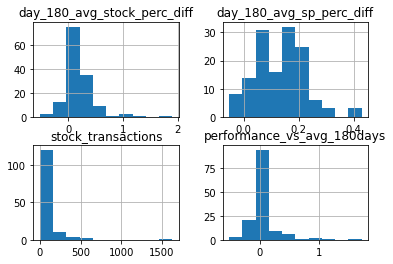

In [28]:
# distirbutions of stock performance
stock_perform.hist();

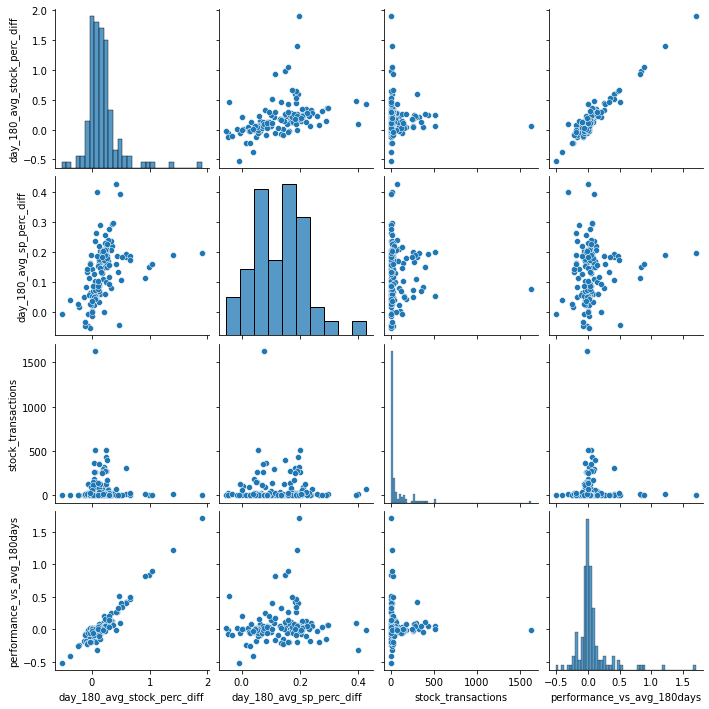

In [29]:
# correlations
sns.pairplot(stock_perform);

In [30]:
stock_perform_sorted.index[:5]

Index(['Austin Scott', 'Kim Schrier', 'Brian Mast', 'Michael Garcia',
       'Frank Pallone'],
      dtype='object', name='representative')

In [31]:
df.head(1)

,level_0,transaction_date,ticker,asset_description,type,amount,representative,timestamp,state,party_x,...,day_180_stock_perc_diff,sp_start,sp_30,sp_30_sp_perc_diff,sp_60,sp_60_sp_perc_diff,sp_90,sp_90_sp_perc_diff,sp_180,sp_180_sp_perc_diff
0,0,2020-03-18,CBRE,CBRE Group Inc Common Stock Class A,sale_partial,"$1,001 - $15,000",Susie Lee,1584504000,Nevada,Democratic,...,0.321,2398.100098,2874.560059,0.199,2953.909912,0.232,3097.73999,0.292,3340.969971,0.393


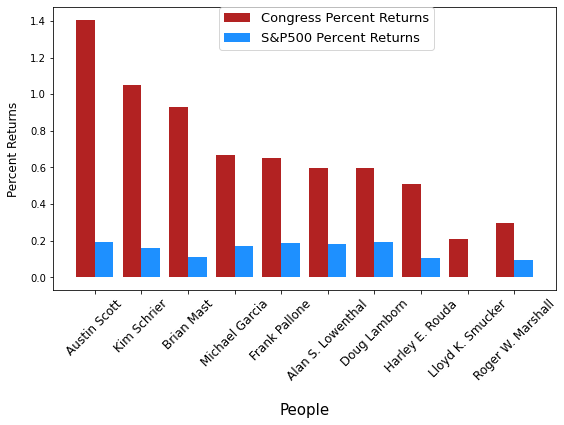

In [32]:
# visualizations

# top 10 congress performers


# get grouped returns by person (fill with columns as needed)
values = stock_perform_sorted[:10]

#getting names of top 5 reps
barchart_names = values.index[:10]
labels = [col for col in barchart_names]
#getting corresponding names 
lst_one = [item for item in values.day_180_avg_stock_perc_diff[:10].values]
lst_two =  [item for item in values.day_180_avg_sp_perc_diff[:10].values]
#make labels and bar locations
x = np.arange(len(labels))  # the label locations
width = 0.4  # the width of the bars
# plot both columns next to eachother 
fig, ax = plt.subplots(figsize = (8, 6))
rects1 = ax.bar(x - width/2, lst_one, width, label='Congress Percent Returns', color = 'firebrick')
rects2 = ax.bar(x + width/2, lst_two, width, label='S&P500 Percent Returns ', color = 'dodgerblue')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percent Returns', fontsize = 12, labelpad = 10)
ax.set_xlabel('People', fontsize = 15, labelpad = 20)
# setting up the graph
#ax.set_ylim([.05,.3])
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize = 12, rotation=45)
ax.legend(loc = (0.33, .85), fontsize = 13, facecolor = 'white')
ax.set_facecolor('white')
fig.tight_layout()
plt.show();

In [33]:
# view of top performers
stock_perform_sorted[:10]

,day_180_avg_stock_perc_diff,day_180_avg_sp_perc_diff,stock_transactions,performance_vs_avg_180days
representative,,,,
Austin Scott,1.404000,0.191000,13,1.213000
Kim Schrier,1.048250,0.159250,8,0.889000
Brian Mast,0.928684,0.112526,19,0.816158
Michael Garcia,0.669136,0.173091,22,0.496045
Frank Pallone,0.653200,0.186000,5,0.467200
Alan S. Lowenthal,0.597287,0.183083,303,0.414205
Doug Lamborn,0.599214,0.193214,14,0.406000
Harley E. Rouda,0.509167,0.105000,6,0.404167
Lloyd K. Smucker,0.210600,-0.000600,10,0.211200


In [34]:
values = stock_perform_sorted[64:74]
values

,day_180_avg_stock_perc_diff,day_180_avg_sp_perc_diff,stock_transactions,performance_vs_avg_180days
representative,,,,
Ed Perlmutter,0.163600,0.179667,30,-0.016067
John B. Larson,-0.064300,-0.047000,30,-0.017300
"David A Perdue , Jr",0.059665,0.077411,1627,-0.017746
Joe Courtney,0.062106,0.081128,94,-0.019021
Susan W. Brooks,0.231333,0.257000,12,-0.025667
John Hoeven,0.020222,0.048392,153,-0.028170
Kelly Loeffler,0.172744,0.201015,262,-0.028271
Tina Smith,0.007077,0.038000,13,-0.030923
"Angus S King, Jr.",0.031037,0.066593,27,-0.035556


The middle 10 congressmen only have a sleight improvment over the market performance.

In [35]:
# Congress' Average performance over the market
stock_perform_sorted['performance_vs_avg_180days'].sum()

4.886053008697781

In [36]:
# 
stock_perform_sorted['day_180_avg_sp_perc_diff'].sum

<bound method Series.sum of representative
Austin Scott                  0.191000
Kim Schrier                   0.159250
Brian Mast                    0.112526
Michael Garcia                0.173091
Frank Pallone                 0.186000
                                ...   
Virginia Foxx                 0.159733
James E. Banks                0.134600
Nicholas Van Taylor           0.142421
Neal Patrick MD, Facs Dunn    0.027125
Billy Long                    0.400000
Name: day_180_avg_sp_perc_diff, Length: 99, dtype: float64>

In [37]:
# convert date to datetime
df['transaction_date'] = df['transaction_date'].astype('datetime64')

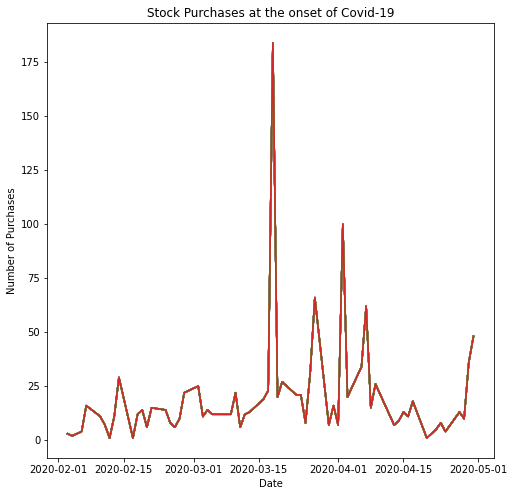

In [38]:
plt.figure(figsize = (8,8))
plt.plot(df[(df['type'] == 'purchase') & (df['transaction_date'] > pd.to_datetime('2020-02-01'))& (df['transaction_date'] < pd.to_datetime('2020-05-01'))].groupby('transaction_date').count().index,
         df[(df['type'] == 'purchase') & (df['transaction_date'] > pd.to_datetime('2020-02-01'))& (df['transaction_date'] < pd.to_datetime('2020-05-01'))].groupby('transaction_date').count())
plt.title('Stock Purchases at the onset of Covid-19')
plt.ylabel('Number of Purchases')
plt.xlabel('Date');

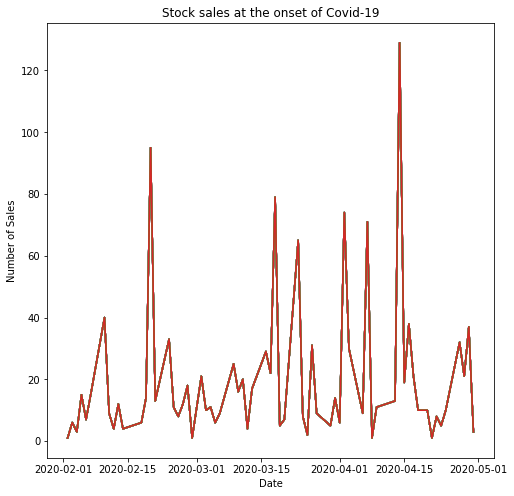

In [39]:
plt.figure(figsize = (8,8))
plt.plot(df[(df['type'] != 'purchase') & (df['transaction_date'] > pd.to_datetime('2020-02-01'))& (df['transaction_date'] < pd.to_datetime('2020-05-01'))].groupby('transaction_date').count().index,
         df[(df['type'] != 'purchase') & (df['transaction_date'] > pd.to_datetime('2020-02-01'))& (df['transaction_date'] < pd.to_datetime('2020-05-01'))].groupby('transaction_date').count() )
plt.title('Stock sales at the onset of Covid-19')
plt.ylabel('Number of Sales')
plt.xlabel('Date');

In [40]:
stock_perform['stock_transactions'].sort_values(ascending=False)[:20]

representative
David A Perdue , Jr      1627
Gilbert Cisneros          516
Sheldon Whitehouse        510
Greg Gianforte            430
Josh Gottheimer           398
Donna Shalala             370
Pat Roberts               352
Dean Phillips             324
Alan S. Lowenthal         303
Donald Sternoff Beyer     293
Susie Lee                 275
Mark Green                271
Kelly Loeffler            262
Susan M Collins           259
Shelley M Capito          258
Thomas R Carper           247
James M Inhofe            179
Ron L Wyden               177
John Hoeven               153
John F Reed               153
Name: stock_transactions, dtype: int64

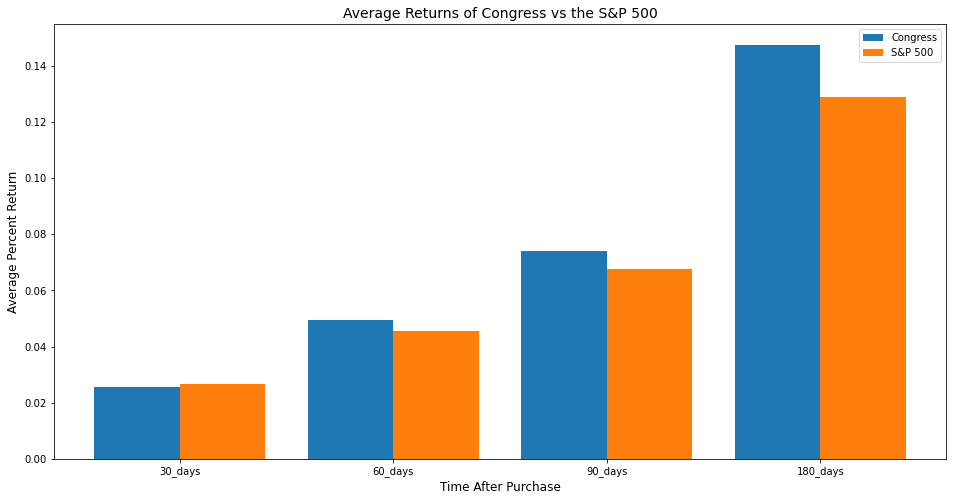

In [41]:
purchase = df.loc[df['type'] == 'purchase']
purchase_stocks = purchase.describe().loc['mean', ['day_30_stock_perc_diff', 'day_60_stock_perc_diff',
                                 'day_90_stock_perc_diff', 'day_180_stock_perc_diff']]
purchase_sp = purchase.describe().loc['mean', ['sp_30_sp_perc_diff', 'sp_60_sp_perc_diff',
                                 'sp_90_sp_perc_diff', 'sp_180_sp_perc_diff']]
plt.figure(figsize = (16, 8))
plt.title('Average Returns of Congress vs the S&P 500', fontsize = 14)
plt.bar([.8, 1.8, 2.8, 3.8], purchase_stocks, width = .4, label = 'Congress')
plt.bar([1.2, 2.2, 3.2, 4.2], purchase_sp, width = .4, label = 'S&P 500')
plt.xticks(ticks = [1, 2,3,4], labels = ['30_days', '60_days', '90_days', '180_days'])
plt.ylabel('Average Percent Return', fontsize = 12)
plt.xlabel('Time After Purchase', fontsize = 12)
plt.legend();

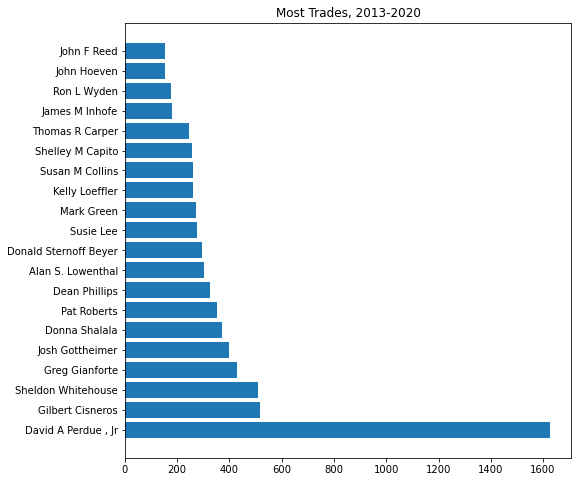

In [42]:
plt.figure(figsize = (8,8))
values = stock_perform['stock_transactions'].sort_values(ascending=False)[:20]

#getting names of middle 10 reps
barchart_names = values.index[:20]

# setting up graph
height = values
labels = [col for col in barchart_names]
y_pos = np.arange(len(labels))

#create horizontal bars
plt.barh(y_pos, height)

# create names on teh x_axis
plt.yticks(y_pos, labels)
plt.title('Most Trades, 2013-2020')
plt.show()

David Perdue is making about 213 transactions a year, which is ~3-4x higher than the next highest Congressmen.

data range:  2013-03-15 through 2020-11-24
